In [2]:
from koselleck import *

In [55]:
df=pd.read_csv('data/data.all_neighborhoods.csv')
df['period2']=df.period.apply(lambda x: int(x[:4])//25*25)
df

,period,run,word,neighborhood,period2
0,1700-1710,run_01,virtue,"wisdom, merit, prudence, punishment, providenc...",1700
1,1700-1710,run_01,value,"allowance, business, profit, injury, trust, hi...",1700
2,1700-1710,run_01,heart,"passion, eyes, mind, face, breast, joy, grief,...",1700
3,1700-1710,run_01,station,"posture, absence, auditors, husbands, contribu...",1700
4,1700-1710,run_02,virtue,"prudence, vertue, equity, temper, providence, ...",1700
...,...,...,...,...,...
2420,1890-1900,run_25,virtue,"chastity, virtues, unselfishness, abnegation, ...",1875
2421,1890-1900,run_25,value,"utility, importance, values, merit, amount, re...",1875
2422,1890-1900,run_25,culture,"intellectual, diffusion, cultivation, aptitude...",1875
2423,1890-1900,run_25,heart,"soul, bosom, breast, hearts, sorrow, grief, an...",1875


In [56]:
def synth(df):
    o=[]
    for (w,p),wdf in df.groupby(['word','period2']):
        counts=Counter()
        ranks=defaultdict(list)
        for neighb in wdf.neighborhood:
            for i,w2 in enumerate(neighb.split(', ')):
                ranks[w2]+=[i+1]
                counts[w2]+=1
        ow=[]
        for w2 in ranks:
            odx={
                'word':w,
                'period':p,
                'word2':w2,
                'rank':np.mean(ranks[w2]),
                'count':counts[w2]
            }
            ow.append(odx)
        owdf=pd.DataFrame(ow)
        owdf['rankcount']=owdf['count'] * (1/ (owdf['rank']+1))
        owdf['rank2']=(-owdf['rankcount']).rank()
        o.append(owdf)
    return pd.concat(o)


In [57]:
# synth(df)

In [63]:
cultdf=synth(df).set_index('word').loc['culture']
cultdf

,period,word2,rank,count,rankcount,rank2
word,,,,,,
culture,1725,vegetation,2.880000,50,12.886598,1.0
culture,1725,gardening,10.769231,39,3.313725,6.0
culture,1725,planting,7.489362,47,5.536341,2.0
culture,1725,situations,8.920000,25,2.520161,7.0
culture,1725,husbandry,14.666667,36,2.297872,10.0
...,...,...,...,...,...,...
culture,1875,hellenic,49.000000,1,0.020000,126.5
culture,1875,specialisation,49.000000,1,0.020000,126.5
culture,1875,quietism,40.000000,1,0.024390,111.5


In [66]:
# words_ever_high=set(figdf.query('rank<10').word2)
# len(words_ever_high)

In [72]:
s=cultdf.word2.value_counts()
badwords=set(s[s<2].index)

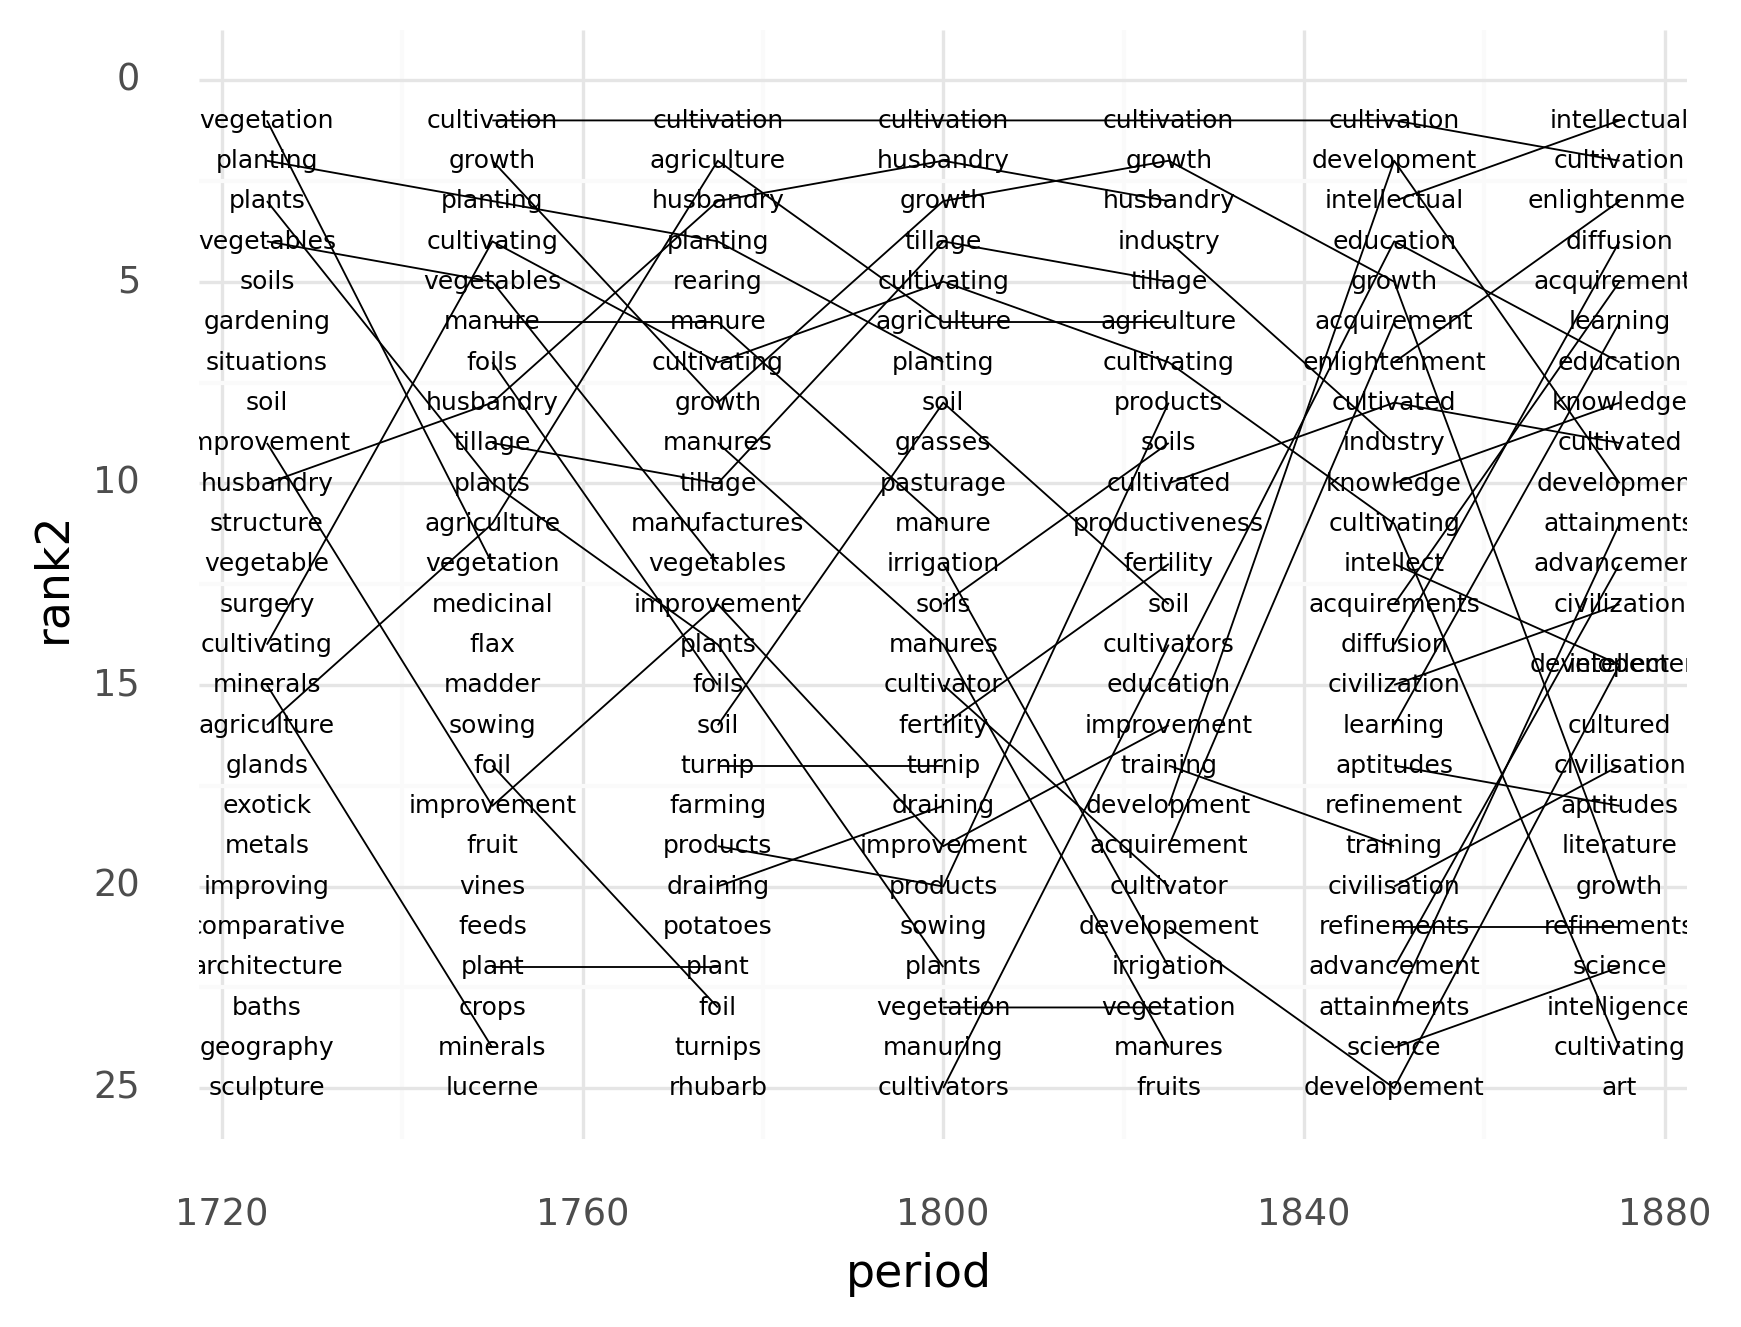

<ggplot: (8729135392061)>

In [101]:
figdf=cultdf
# figdf=figdf[~figdf.word2.isin(badwords)]
# words_ever_good=set(figdf.query('rank2<10').word2)
# figdf=figdf[figdf.word2.isin(words_ever_good)]
# maxr=25
# figdf2=figdf.pivot('word2','period','rank2').fillna(maxr)
# figdf=figdf2.reset_index().melt(id_vars=['word2'],value_name='rank2')

p9.ggplot(
    figdf,
    p9.aes(x='period',y='rank2',label='word2',group='word2')
) + p9.geom_line(size=0.25) + p9.geom_text(size=6) + p9.theme_minimal() + p9.scale_y_reverse(limits=[0,25])

In [102]:
figdf[figdf.word2=='soil']

,period,word2,rank,count,rankcount,rank2
word,,,,,,
culture,1725,soil,18.434783,46,2.366890,8.0
culture,1750,soil,39.166667,12,0.298755,86.0
culture,1775,soil,10.080000,25,2.256318,16.0
culture,1800,soil,12.573333,75,5.525540,8.0
culture,1825,soil,17.440000,50,2.711497,13.0
culture,1850,soil,41.000000,3,0.071429,112.5
